# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [116]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [117]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [118]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [119]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


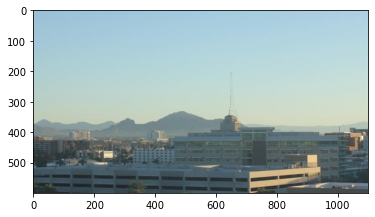

In [120]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
###  Find the average brightness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [121]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

In [122]:
# extra feature for improve the accuracy
def avg_sky_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    upper_height = 100
    sky_img = hsv[:upper_height,:, 2]

    sky_sum = np.sum(sky_img)
    area = upper_height*1100.0
    avg_sky = sky_sum/area
    plt.imshow(sky_img, cmap='gray')
    return avg_sky



Avg brightness: 128.49131212121213 Avg sky brightness: 222.7546090909091


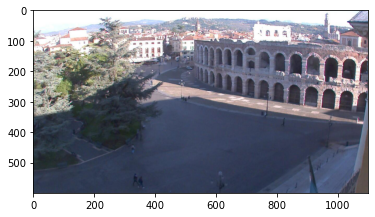

In [140]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 56
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
avg_sky = avg_sky_brightness(test_im)
print('Avg brightness: ' + str(avg), 'Avg sky brightness: ' + str(avg_sky))
plt.imshow(test_im)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### TODO: Build a complete classifier 

Set a threshold that you think will separate the day and night images by average brightness.

In [154]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    ## TODO: extract average brightness feature from an RGB image 
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    avg = avg_brightness(rgb_image)
    avg_sky = avg_sky_brightness(rgb_image)
    # print('avg: ', avg)
    ## TODO: set the value of a threshold that will separate day and night images
    threshold_whole = 100
    threshold_sky = 110
    ## TODO: Return the predicted_label (0 or 1) based on whether the avg is 
    # above or below the threshold
    if avg > threshold_whole or avg_sky > threshold_sky:
        predicted_label = 1
    if avg_sky < threshold_sky:
        predicted_label = 0
    
    return predicted_label  
    

predicted_label:  1
test_label:  1
classified


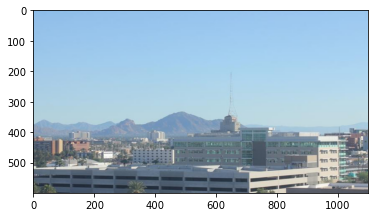

In [155]:
## Test out your code by calling the above function and seeing 
# how some of your training data is classified
img_num = 3
test_img, test_label = STANDARDIZED_LIST[img_num]
predicted_label = estimate_label(test_img)
plt.imshow(test_img)

print('predicted_label: ', predicted_label)
print('test_label: ', test_label)

if predicted_label == test_label:
    print('classified')
else:
    print("unclassified")


In [156]:
# store all misclassifed images
def mis_classified(images):
    mis_classified_imgs = []
    
    for i in images:
        image = i[0]
        true_label = i[1]
        predicted_label = estimate_label(image)
        
        if true_label != predicted_label:
            mis_classified_imgs.append([image, true_label, predicted_label])
    
    return mis_classified_imgs


The trainning accuracy is: 100.0%. 0 out of 240 are misclassified


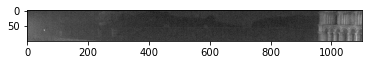

In [157]:
# accuracy of trainning
mis_classified_train = mis_classified(STANDARDIZED_LIST)
mis_num = len(mis_classified_train)
total = len(STANDARDIZED_LIST)
accuracy = (total - mis_num) / total
print('The trainning accuracy is: {}%. {} out of {} are misclassified'.format(accuracy*100, mis_num, total))


In [158]:
# show misclassified image
img_num = 1
img, true_label, predicted_label = mis_classified_train[img_num]
avg = avg_brightness(img)
avg_sky = avg_sky_brightness(img)
print('Avg brightness: ' + str(avg), 'Avg sky brightness: ' + str(avg_sky))
plt.imshow(img)
print('true label: {}, predicted lable: {}'.format(true_label, predicted_label))

IndexError: list index out of range